In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"

In [233]:
df = pd.read_csv("Match_Information_cleaned.csv")

In [234]:
df.head()

,gameId,gameDuration,gameVersion,platformId,season,winner,1st_baron,1st_dragon,1st_inhibitor,1st_riftHerald,...,t2_baron_kills,t2_champ_kills,t2_dragon_kills,t2_inhibitor_kills,t2_riftHerald_kills,t2_tower_kills,t2_team_assists,t2_team_gold_earn,t2_team_gold_spen,t2_team_kda
0,1245810008,43.0,11.22.406.3587,EUW1,11,2,1,1,2,1,...,2,52,4,5,1,11,58,89056,86000,2.619048
1,1245827001,20.0,11.22.406.3587,EUW1,11,1,0,2,1,1,...,0,25,1,0,1,0,37,39261,37685,1.476190
2,1243137392,33.0,11.22.406.3587,EUW1,11,2,1,2,2,1,...,0,35,4,1,0,7,53,63064,56970,3.259259
3,1243091838,32.0,11.22.406.3587,EUW1,11,2,2,1,2,2,...,2,43,2,5,1,11,66,71984,63978,3.114286
4,770956820,51.0,11.2.353.8505,EUW1,11,1,2,2,1,1,...,1,66,2,1,0,8,93,103306,96280,1.915663


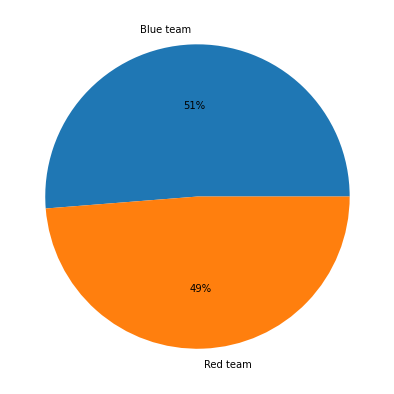

In [235]:
# Analysis different team's winning rate
blue_win = df[df['winner']==1]['gameId'].count()/df.shape[0]
red_win = df[df['winner']==2]['gameId'].count()/df.shape[0]

plt.figure(figsize=(7, 7))
sizes = [blue_win, red_win]
labels = ('Blue team', 'Red team')
plt.pie(sizes, labels = labels, autopct='%1.0f%%');

From the previous graph, we find out that the data set is very balances. Blue team and red team both have almost 50% rate to win, that means we don't have to worry about imbalance data issue.

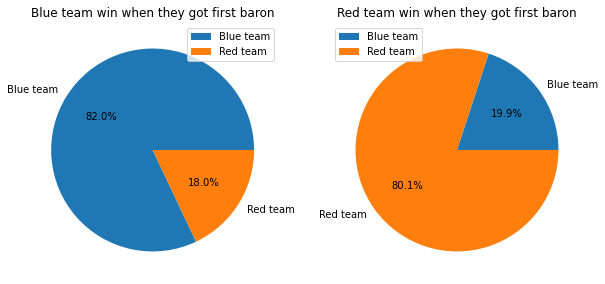

In [236]:
blue_1st_baron = df[(df['winner'] == 1) & (df['1st_baron'] == 1)]['gameId'].count() / df[df['1st_baron'] == 1]['gameId'].count()
red_1st_baron = df[(df['winner'] == 2) & (df['1st_baron'] == 2)]['gameId'].count() / df[df['1st_baron'] == 2]['gameId'].count()

plt.figure(figsize=(10, 10))

p1 = plt.subplot(1, 2, 1)
labels = ('Blue team', 'Red team')
p1.pie([blue_1st_baron, 1 - blue_1st_baron], labels = labels, autopct='%1.1f%%')
p1.set_title("Blue team win when they got first baron")
plt.legend()

p2 = plt.subplot(1, 2, 2)
labels = ('Blue team', 'Red team')
p2.pie([1- red_1st_baron, red_1st_baron], labels = labels, autopct='%1.1f%%')
p2.set_title("Red team win when they got first baron")
plt.legend();

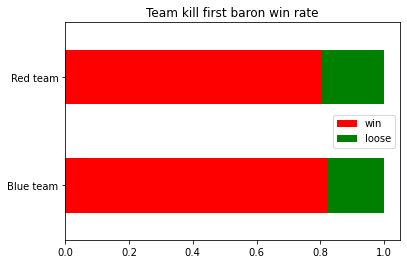

In [237]:
labels = ['Blue team', 'Red team']

num_list = [blue_1st_baron, red_1st_baron]
num_list_1 = [1- blue_1st_baron, 1- red_1st_baron]

dd = pd.DataFrame({'win': num_list, 'loose':num_list_1}, index=labels)
ax = dd.plot.barh(color={"win": "red", "loose": "green"}, stacked = True)

plt.title("Team kill first baron win rate");

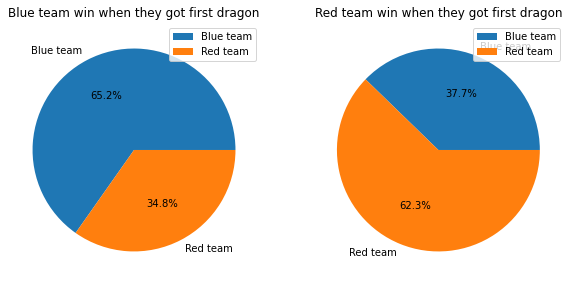

In [238]:
blue_1st_dragon = df[(df['winner'] == 1) & (df['1st_dragon'] == 1)]['gameId'].count() / df[df['1st_dragon'] == 1]['gameId'].count()
red_1st_dragon = df[(df['winner'] == 2) & (df['1st_dragon'] == 2)]['gameId'].count() / df[df['1st_dragon'] == 2]['gameId'].count()

plt.figure(figsize=(10, 10))

p1 = plt.subplot(1, 2, 1)
labels = ('Blue team', 'Red team')
p1.pie([blue_1st_dragon, 1 - blue_1st_dragon], labels = labels, autopct='%1.1f%%')
p1.set_title("Blue team win when they got first dragon")
plt.legend()

p2 = plt.subplot(1, 2, 2)
labels = ('Blue team', 'Red team')
p2.pie([1- red_1st_dragon, red_1st_dragon], labels = labels, autopct='%1.1f%%')
p2.set_title("Red team win when they got first dragon")
plt.legend();

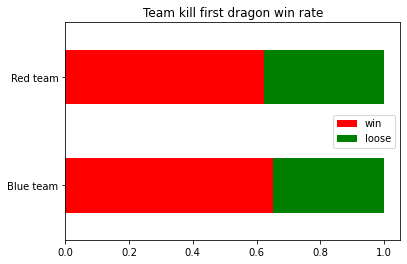

In [239]:
labels = ['Blue team', 'Red team']

num_list = [blue_1st_dragon, red_1st_dragon]
num_list_1 = [1- blue_1st_dragon, 1- red_1st_dragon]

dd = pd.DataFrame({'win': num_list, 'loose':num_list_1}, index=labels)
ax = dd.plot.barh(color={"win": "red", "loose": "green"}, stacked = True)

plt.title("Team kill first dragon win rate");

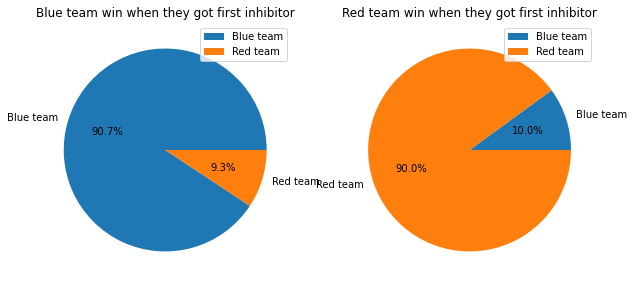

In [240]:
blue_1st_inhibitor = df[(df['winner'] == 1) & (df['1st_inhibitor'] == 1)]['gameId'].count() / df[df['1st_inhibitor'] == 1]['gameId'].count()
red_1st_inhibitor = df[(df['winner'] == 2) & (df['1st_inhibitor'] == 2)]['gameId'].count() / df[df['1st_inhibitor'] == 2]['gameId'].count()

plt.figure(figsize=(10, 10))

p1 = plt.subplot(1, 2, 1)
labels = ('Blue team', 'Red team')
p1.pie([blue_1st_inhibitor, 1 - blue_1st_inhibitor], labels = labels, autopct='%1.1f%%')
p1.set_title("Blue team win when they got first inhibitor")
plt.legend();

p2 = plt.subplot(1, 2, 2)
labels = ('Blue team', 'Red team')
p2.pie([1- red_1st_inhibitor, red_1st_inhibitor], labels = labels, autopct='%1.1f%%')
p2.set_title("Red team win when they got first inhibitor")
plt.legend();

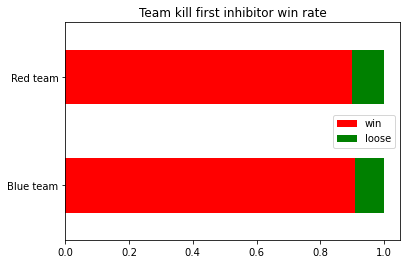

In [241]:
labels = ['Blue team', 'Red team']

num_list = [blue_1st_inhibitor, red_1st_inhibitor]
num_list_1 = [1- blue_1st_inhibitor, 1- red_1st_inhibitor]

dd = pd.DataFrame({'win': num_list, 'loose':num_list_1}, index=labels)
ax = dd.plot.barh(color={"win": "red", "loose": "green"}, stacked = True)

plt.title("Team kill first inhibitor win rate");

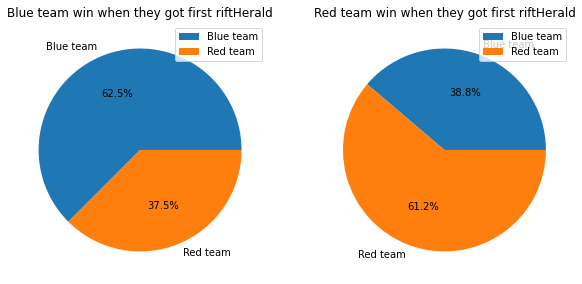

In [242]:
blue_1st_riftHerald = df[(df['winner'] == 1) & (df['1st_riftHerald'] == 1)]['gameId'].count() / df[df['1st_riftHerald'] == 1]['gameId'].count()
red_1st_riftHerald = df[(df['winner'] == 2) & (df['1st_riftHerald'] == 2)]['gameId'].count() / df[df['1st_riftHerald'] == 2]['gameId'].count()

plt.figure(figsize=(10, 10))

p1 = plt.subplot(1, 2, 1)
labels = ('Blue team', 'Red team')
p1.pie([blue_1st_riftHerald, 1 - blue_1st_riftHerald], labels = labels, autopct='%1.1f%%')
p1.set_title("Blue team win when they got first riftHerald")
plt.legend();

p2 = plt.subplot(1, 2, 2)
labels = ('Blue team', 'Red team')
p2.pie([1- red_1st_riftHerald, red_1st_riftHerald], labels = labels, autopct='%1.1f%%')
p2.set_title("Red team win when they got first riftHerald")
plt.legend();

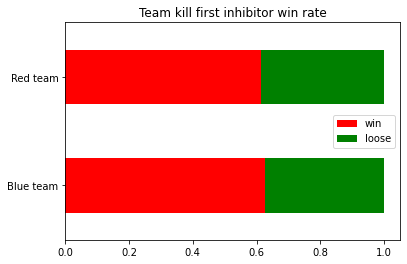

In [243]:
num_list = [blue_1st_riftHerald, red_1st_riftHerald]
num_list_1 = [1- blue_1st_riftHerald, 1- red_1st_riftHerald]

dd = pd.DataFrame({'win': num_list, 'loose':num_list_1}, index=labels)
ax = dd.plot.barh(color={"win": "red", "loose": "green"}, stacked = True)

plt.title("Team kill first riftHerald win rate");

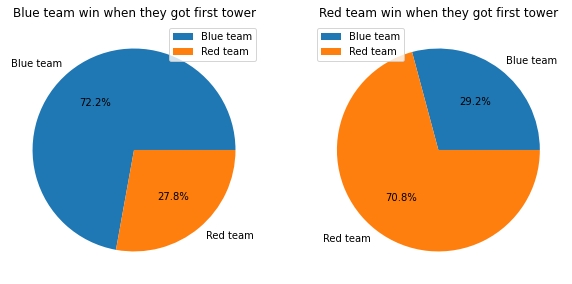

In [244]:
blue_1st_tower = df[(df['winner'] == 1) & (df['1st_tower'] == 1)]['gameId'].count() / df[df['1st_tower'] == 1]['gameId'].count()
red_1st_tower = df[(df['winner'] == 2) & (df['1st_tower'] == 2)]['gameId'].count() / df[df['1st_tower'] == 2]['gameId'].count()

plt.figure(figsize=(10, 10))

p1 = plt.subplot(1, 2, 1)
labels = ('Blue team', 'Red team')
p1.pie([blue_1st_tower, 1 - blue_1st_tower], labels = labels, autopct='%1.1f%%')
p1.set_title("Blue team win when they got first tower")
plt.legend();

p2 = plt.subplot(1, 2, 2)
labels = ('Blue team', 'Red team')
p2.pie([1- red_1st_tower, red_1st_tower], labels = labels, autopct='%1.1f%%')
p2.set_title("Red team win when they got first tower")
plt.legend();

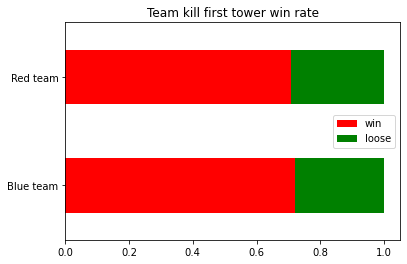

In [245]:
labels = ['Blue team', 'Red team']

num_list = [blue_1st_tower, red_1st_tower]
num_list_1 = [1- blue_1st_tower, 1- red_1st_tower]

dd = pd.DataFrame({'win': num_list, 'loose':num_list_1}, index=labels)
ax = dd.plot.barh(color={"win": "red", "loose": "green"}, stacked = True)

plt.title("Team kill first tower win rate");

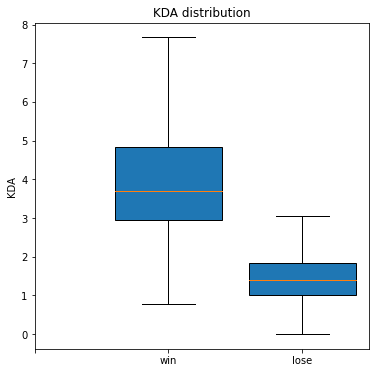

In [246]:
win = []
lose = []

for b, r , w in zip(df['t1_team_kda'], df['t2_team_kda'], df['winner']):
    if w == 1:
        win.append(b)
        lose.append(r)
    else:
        win.append(r)
        lose.append(b)

match = [win, lose]

plt.figure(figsize=(6, 6))
plt.boxplot(match, patch_artist=True, showfliers=False, widths=0.8)
plt.xticks(np.arange(3), ('', 'win', 'lose'))
plt.ylabel('KDA')
plt.title('KDA distribution');

In [247]:
w = pd.Series(win)
l = pd.Series(lose)

print("winner describe")
w.describe()
print("looer describe")
l.describe()

winner describe


count    19632.000000
mean         4.262465
std          2.570673
min          0.000000
25%          2.937302
50%          3.703203
75%          4.833334
max         62.000000
dtype: float64

looer describe


count    19632.000000
mean         1.445917
std          0.623549
min          0.000000
25%          1.000000
50%          1.388889
75%          1.826087
max          7.000000
dtype: float64

In order to understand the importance of each feature or the relevance between features, one can find the relevance between two features or between a feature and a label. I will use Pearson product-moment correlation coefficient。  

In [248]:
info_names = [c[3:] for c in df.columns if c.startswith('t2_')] 

df['br_win'] = 1 - df['winner']//2

for i in info_names:
    df['br_' + i] = df['t1_' + i] - df['t2_' + i]

df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'platformId', 'season',
       'winner', '1st_baron', '1st_dragon', '1st_inhibitor', '1st_riftHerald',
       '1st_tower', 't1_baron_kills', 't1_champ_kills', 't1_dragon_kills',
       't1_inhibitor_kills', 't1_riftHerald_kills', 't1_tower_kills',
       't1_team_assists', 't1_team_gold_earn', 't1_team_gold_spen',
       't1_team_kda', 't2_baron_kills', 't2_champ_kills', 't2_dragon_kills',
       't2_inhibitor_kills', 't2_riftHerald_kills', 't2_tower_kills',
       't2_team_assists', 't2_team_gold_earn', 't2_team_gold_spen',
       't2_team_kda', 'br_win', 'br_baron_kills', 'br_champ_kills',
       'br_dragon_kills', 'br_inhibitor_kills', 'br_riftHerald_kills',
       'br_tower_kills', 'br_team_assists', 'br_team_gold_earn',
       'br_team_gold_spen', 'br_team_kda'],
      dtype='object')

In [249]:
df.head()

,gameId,gameDuration,gameVersion,platformId,season,winner,1st_baron,1st_dragon,1st_inhibitor,1st_riftHerald,...,br_baron_kills,br_champ_kills,br_dragon_kills,br_inhibitor_kills,br_riftHerald_kills,br_tower_kills,br_team_assists,br_team_gold_earn,br_team_gold_spen,br_team_kda
0,1245810008,43.0,11.22.406.3587,EUW1,11,2,1,1,2,1,...,-1,-10,-2,-5,0,-8,9,-6202,-5361,-0.522894
1,1245827001,20.0,11.22.406.3587,EUW1,11,1,0,2,1,1,...,0,17,0,2,0,9,10,14097,12533,2.083810
2,1243137392,33.0,11.22.406.3587,EUW1,11,2,1,2,2,1,...,2,-8,-4,-1,2,-1,-11,2787,7575,-1.287831
3,1243091838,32.0,11.22.406.3587,EUW1,11,2,2,1,2,2,...,-2,-8,0,-5,0,-8,-11,-10125,-3953,-1.021262
4,770956820,51.0,11.2.353.8505,EUW1,11,1,2,2,1,1,...,-1,17,3,2,1,0,5,-2090,-5505,0.826762


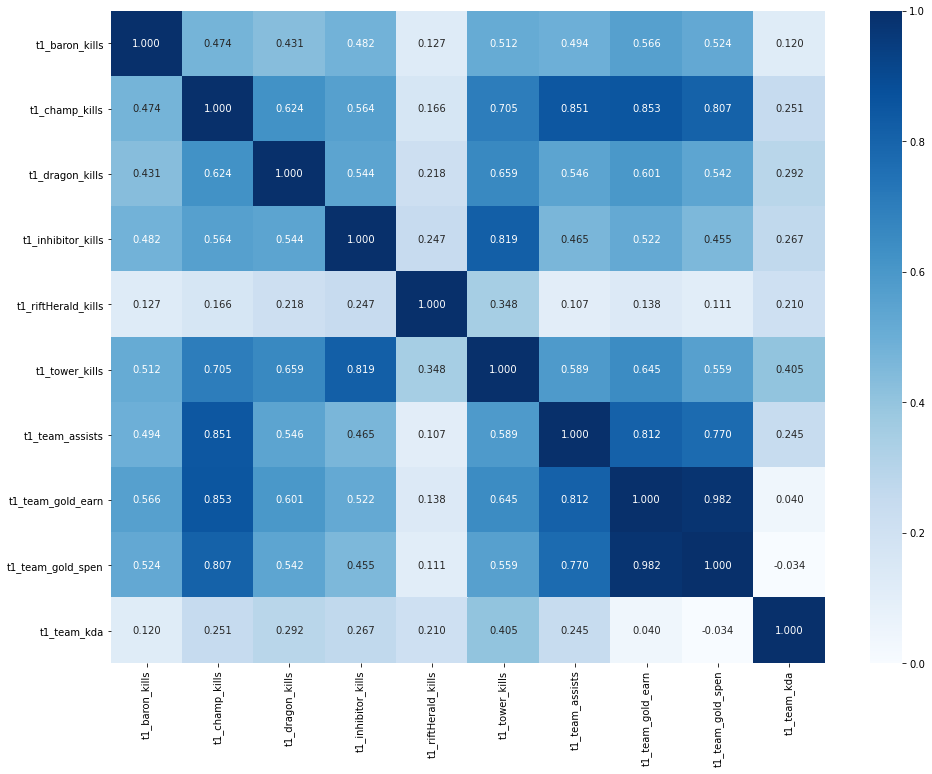

In [250]:
plt.figure(figsize=(16, 12))

corm = df[[c for c in df.columns if c.startswith('t1_')]].corr() 
cg_b = sns.heatmap(corm, cmap='Blues', annot=True, fmt='.3f', vmin=0);

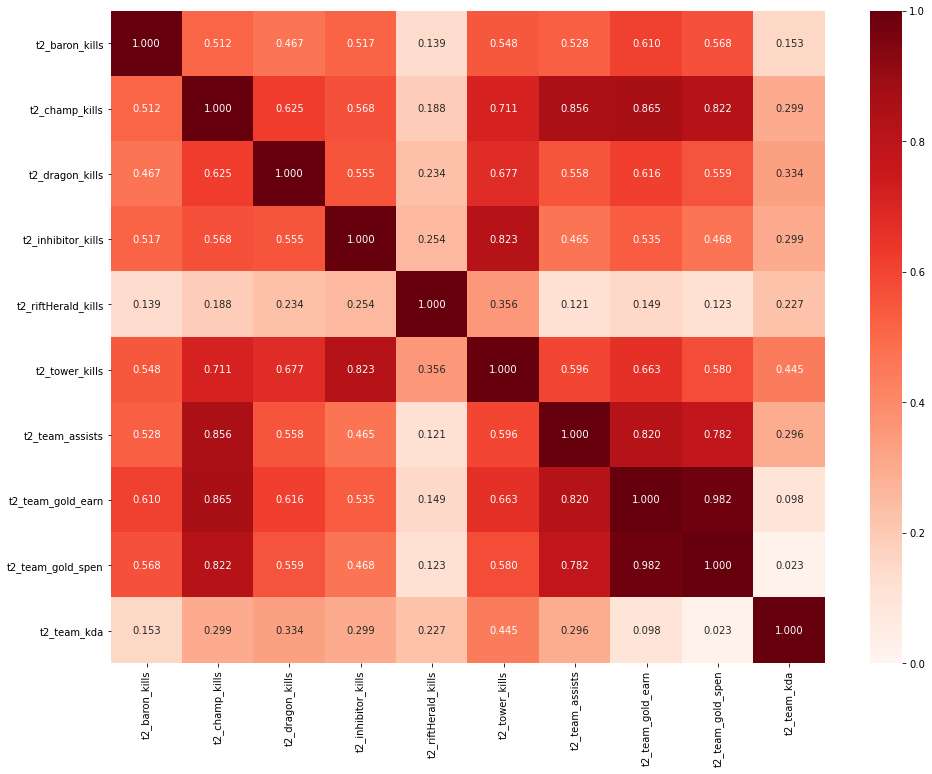

In [251]:
plt.figure(figsize=(16, 12))

corm = df[[c for c in df.columns if c.startswith('t2_')]].corr() 
cg_r = sns.heatmap(corm, cmap='Reds', annot=True, fmt='.3f', vmin=0);

<Figure size 1152x864 with 0 Axes>

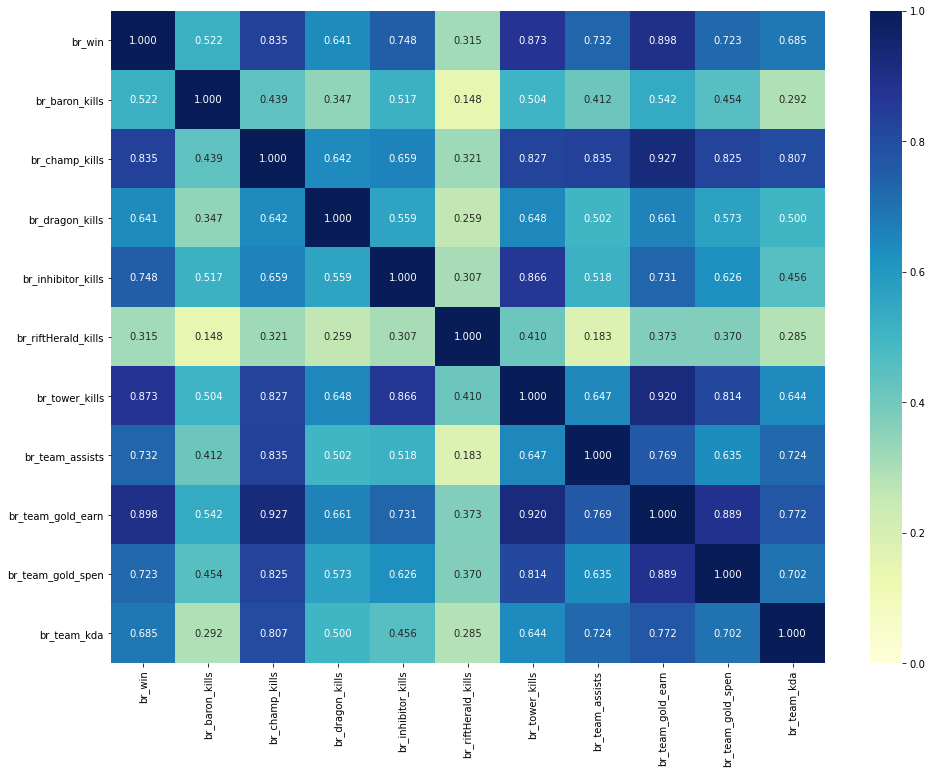

In [252]:
plt.figure(figsize=(16, 12))

corm = df[[d for d in df.columns if d.startswith('br_')]].corr() 
cg_b = sns.heatmap(corm, cmap='YlGnBu', annot=True, fmt='.3f', vmin=0)

The number of kill jungle monsters 

In [304]:
# Dragon killed number
dk = df["t1_dragon_kills"]
dk.value_counts()


2    4864
1    4339
3    4026
0    3606
4    2337
5     440
6      18
7       2
Name: t1_dragon_kills, dtype: int64

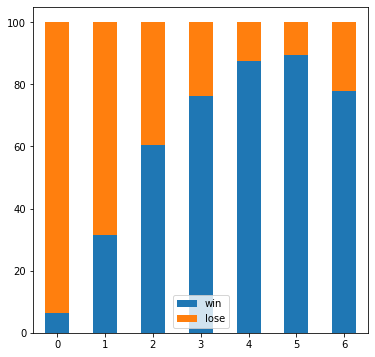

In [306]:
new = {}
c = []
q = []

for i in range(min(dk), max(dk)+1):
    win = round(len(df[(dk == i) & (df['winner']==1)]) / len(df[(dk == i)]) * 100, 2)
    c.append(win)
    q.append(round(100-win, 2))

new['win'] = c
new['lose'] = q
a = pd.DataFrame(new)

a[0:7].plot.bar(stacked = True, figsize = (6, 6), rot=0);

In [302]:
# Baron killed number
dk = df["t1_baron_kills"]
dk.value_counts()

0    12966
1     5530
2     1072
3       61
4        3
Name: t1_baron_kills, dtype: int64

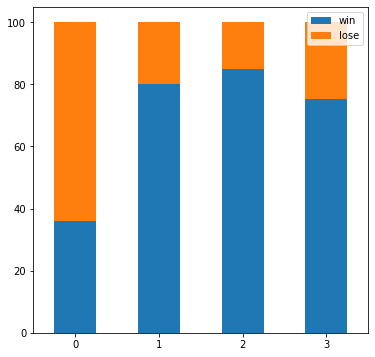

In [303]:
# only three record shows up t1 kill three baron, so we should remove this record
new = {}
c = []
q = []

for i in range(min(dk), max(dk)+1):
    win = round(len(df[(dk == i) & (df['winner']==1)]) / len(df[(dk == i)]) * 100, 2)
    c.append(win)
    q.append(round(100-win, 2))

new['win'] = c
new['lose'] = q
a = pd.DataFrame(new)

# remove 4 baron killed
a[0:4].plot.bar(stacked = True, figsize = (6, 6), rot=0);

In [307]:
# riftHerald killed number
dk = df["t1_riftHerald_kills"]
dk.value_counts()

0    8608
1    7793
2    3231
Name: t1_riftHerald_kills, dtype: int64

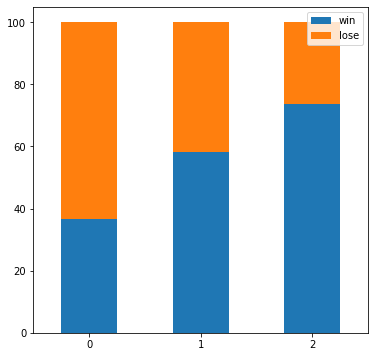

In [308]:
new = {}
c = []
q = []

for i in range(min(dk), max(dk)+1):
    win = round(len(df[(dk == i) & (df['winner']==1)]) / len(df[(dk == i)]) * 100, 2)
    c.append(win)
    q.append(round(100-win, 2))

new['win'] = c
new['lose'] = q
a = pd.DataFrame(new)

a.plot.bar(stacked = True, figsize = (6, 6), rot=0);

In [309]:
# tower killed number
dk = df["t1_tower_kills"]
dk.value_counts()

0     2086
9     1984
10    1815
1     1808
8     1699
11    1681
3     1678
2     1594
7     1539
4     1335
5     1291
6     1122
Name: t1_tower_kills, dtype: int64

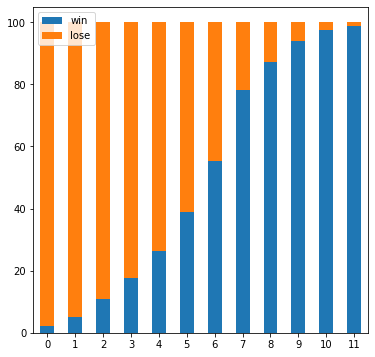

In [311]:
new = {}
c = []
q = []

for i in range(min(dk), max(dk)+1):
    win = round(len(df[(dk == i) & (df['winner']==1)]) / len(df[(dk == i)]) * 100, 2)
    c.append(win)
    q.append(round(100-win, 2))

new['win'] = c
new['lose'] = q
a = pd.DataFrame(new)

a.plot.bar(stacked = True, figsize = (6, 6), rot=0);

In [312]:
# inhibitor killed number
dk = df["t1_inhibitor_kills"]
dk.value_counts()

0    10063
1     4303
2     3138
3     1498
4      428
5      138
6       42
7       16
8        6
Name: t1_inhibitor_kills, dtype: int64

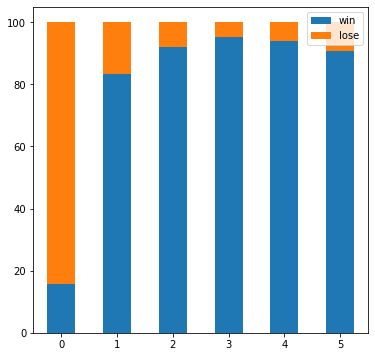

In [314]:
new = {}
c = []
q = []

for i in range(min(dk), max(dk)+1):
    win = round(len(df[(dk == i) & (df['winner']==1)]) / len(df[(dk == i)]) * 100, 2)
    c.append(win)
    q.append(round(100-win, 2))

new['win'] = c
new['lose'] = q
a = pd.DataFrame(new)

a[0:6].plot.bar(stacked = True, figsize = (6, 6), rot=0);